# How does the number of hours spent listening to music per day affect mental health?

- Longer hours spent helped mental health?

In [2]:
# Import dependencies
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress

In [3]:
# Read the CSV file
path = '../Data/mxmh_survey_results (1).csv'
survey_df = pd.read_csv(path)
survey_df

,Timestamp,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,...,Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects,Permissions
0,8/27/2022 19:29:02,18.0,Spotify,3.0,Yes,Yes,Yes,Latin,Yes,Yes,...,Sometimes,Very frequently,Never,Sometimes,3.0,0.0,1.0,0.0,NaN,I understand.
1,8/27/2022 19:57:31,63.0,Pandora,1.5,Yes,No,No,Rock,Yes,No,...,Sometimes,Rarely,Very frequently,Rarely,7.0,2.0,2.0,1.0,NaN,I understand.
2,8/27/2022 21:28:18,18.0,Spotify,4.0,No,No,No,Video game music,No,Yes,...,Never,Rarely,Rarely,Very frequently,7.0,7.0,10.0,2.0,No effect,I understand.
3,8/27/2022 21:40:40,61.0,YouTube Music,2.5,Yes,No,Yes,Jazz,Yes,Yes,...,Sometimes,Never,Never,Never,9.0,7.0,3.0,3.0,Improve,I understand.
4,8/27/2022 21:54:47,18.0,Spotify,4.0,Yes,No,No,R&B,Yes,No,...,Very frequently,Very frequently,Never,Rarely,7.0,2.0,5.0,9.0,Improve,I understand.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
731,10/30/2022 14:37:28,17.0,Spotify,2.0,Yes,Yes,No,Rock,Yes,Yes,...,Never,Rarely,Very frequently,Never,7.0,6.0,0.0,9.0,Improve,I understand.
732,11/1/2022 22:26:42,18.0,Spotify,1.0,Yes,Yes,No,Pop,Yes,Yes,...,Never,Never,Sometimes,Sometimes,3.0,2.0,2.0,5.0,Improve,I understand.
733,11/3/2022 23:24:38,19.0,Other streaming service,6.0,Yes,No,Yes,Rap,Yes,No,...,Sometimes,Sometimes,Rarely,Rarely,2.0,2.0,2.0,2.0,Improve,I understand.
734,11/4/2022 17:31:47,19.0,Spotify,5.0,Yes,Yes,No,Classical,No,No,...,Never,Never,Never,Sometimes,2.0,3.0,2.0,1.0,Improve,I understand.


In [4]:
# Check DataFrame any null value
survey_df.count()

Timestamp                       736
Age                             735
Primary streaming service       735
Hours per day                   736
While working                   733
Instrumentalist                 732
Composer                        735
Fav genre                       736
Exploratory                     736
Foreign languages               732
BPM                             629
Frequency [Classical]           736
Frequency [Country]             736
Frequency [EDM]                 736
Frequency [Folk]                736
Frequency [Gospel]              736
Frequency [Hip hop]             736
Frequency [Jazz]                736
Frequency [K pop]               736
Frequency [Latin]               736
Frequency [Lofi]                736
Frequency [Metal]               736
Frequency [Pop]                 736
Frequency [R&B]                 736
Frequency [Rap]                 736
Frequency [Rock]                736
Frequency [Video game music]    736
Anxiety                     

In [5]:
survey_df= survey_df.fillna({"BPM": ''})
cleaned_survey_df= survey_df.dropna(how='any')
cleaned_survey_df.count()

Timestamp                       718
Age                             718
Primary streaming service       718
Hours per day                   718
While working                   718
Instrumentalist                 718
Composer                        718
Fav genre                       718
Exploratory                     718
Foreign languages               718
BPM                             718
Frequency [Classical]           718
Frequency [Country]             718
Frequency [EDM]                 718
Frequency [Folk]                718
Frequency [Gospel]              718
Frequency [Hip hop]             718
Frequency [Jazz]                718
Frequency [K pop]               718
Frequency [Latin]               718
Frequency [Lofi]                718
Frequency [Metal]               718
Frequency [Pop]                 718
Frequency [R&B]                 718
Frequency [Rap]                 718
Frequency [Rock]                718
Frequency [Video game music]    718
Anxiety                     

In [6]:
narrow_cleaned_df = cleaned_survey_df[['Age', 'Anxiety', 'Depression', 'Insomnia', 'OCD', 'Music effects']]
narrow_cleaned_df_copy = narrow_cleaned_df.copy()
narrow_cleaned_df_copy

,Age,Anxiety,Depression,Insomnia,OCD,Music effects
2,18.0,7.0,7.0,10.0,2.0,No effect
3,61.0,9.0,7.0,3.0,3.0,Improve
4,18.0,7.0,2.0,5.0,9.0,Improve
5,18.0,8.0,8.0,7.0,7.0,Improve
6,18.0,4.0,8.0,6.0,0.0,Improve
...,...,...,...,...,...,...
731,17.0,7.0,6.0,0.0,9.0,Improve
732,18.0,3.0,2.0,2.0,5.0,Improve
733,19.0,2.0,2.0,2.0,2.0,Improve
734,19.0,2.0,3.0,2.0,1.0,Improve


In [7]:
counts = narrow_cleaned_df_copy['Age'].value_counts()
counts

Age
18.0    81
19.0    60
17.0    59
21.0    48
16.0    44
        ..
73.0     1
72.0     1
69.0     1
10.0     1
89.0     1
Name: count, Length: 61, dtype: int64

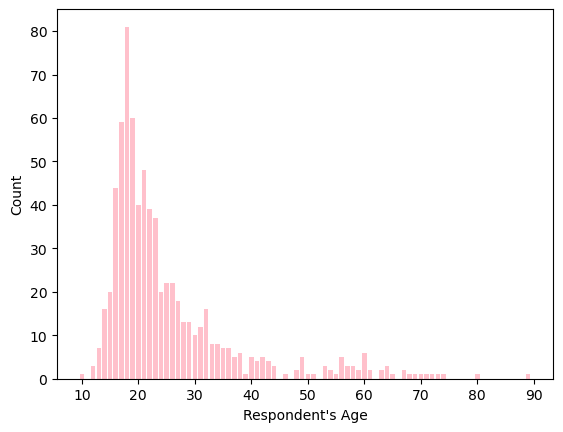

In [8]:
plt.bar(counts.index, counts.values, color= 'pink', align='center')
plt.xlabel("Respondent's Age")
plt.ylabel("Count")
plt.show()